# Testing

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.colors import LogNorm
%matplotlib inline

In [68]:
N =4
n =3.
a= np.arange(n*N).reshape((N,n))
b = np.linspace(1,n,n)

np.divide(a,b)


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


array([[ 0.        ,  0.5       ,  0.66666667],
       [ 3.        ,  2.        ,  1.66666667],
       [ 6.        ,  3.5       ,  2.66666667],
       [ 9.        ,  5.        ,  3.66666667]])

In [69]:
x1 = np.arange(12.0).reshape((4, 3))
x2 = np.arange(3.0)
np.divide(x1, x2)


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


array([[  nan,   1. ,   1. ],
       [  inf,   4. ,   2.5],
       [  inf,   7. ,   4. ],
       [  inf,  10. ,   5.5]])

# Test chi2 distribution

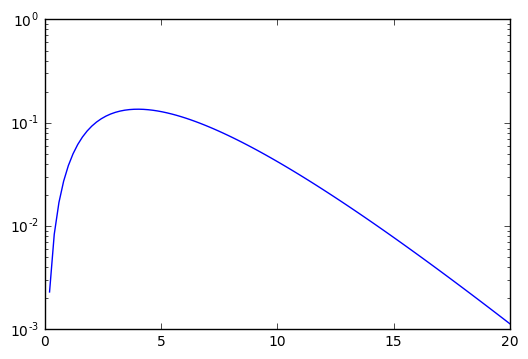

In [70]:
x= np.linspace(0,20,100)
xi2 = st.chi2.pdf(x,6)

plt.figure()
plt.semilogy(x,xi2)


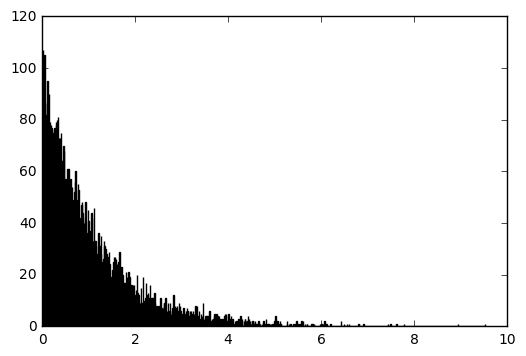

In [71]:
N = int(1e4)
y = np.random.randn(N)
x = np.random.randn(N)
j = 0.5*(x**2 + y**2)

plt.figure()
plt.hist(j,bins=1000);

In [73]:
a  = np.arange(10)
aa = []

for i in range(5):
    aa += [a+i]
    
aa = np.array(aa)
print(np.shape(aa))
dj = np.polyfit(np.arange(5),aa,1)[0]

(5, 10)


In [74]:
dj

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [97]:
D = 1
sig = D/np.sqrt(3)
var = D**3/3*2 /D
print(var)
sig = D/np.sqrt(3)
print(sig)

0.6666666666666666
0.57735026919


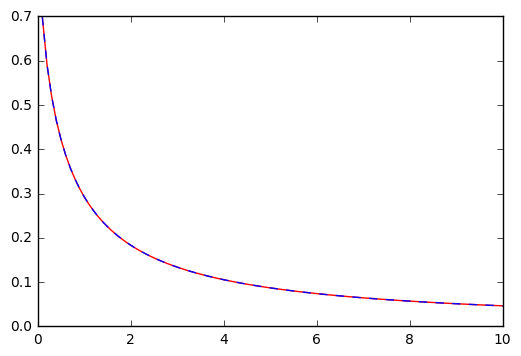

In [101]:
x = np.linspace(0.1,10,100)
f1 = 1/(1+x+np.sqrt(x*(1+x)))
f2 = 1-1/(np.sqrt(1+1/x))
plt.figure()
plt.plot(x,f1,'r')
plt.plot(x,f2,'b--')

# 2D histogram

In [232]:
N = int(4e6)
a = (np.random.randn(N))**2
b = np.random.randn(N)+0.1*a**2
nbin = 50
xedge = np.linspace(0,np.max(a),nbin+1)
ns,xs = np.histogram(a,bins=xedge)

def centerit(x):
    return x[1:]-np.diff(x[:2])[0]*0.5

In [237]:
%%timeit -n 10

H,xedges,yedges = np.histogram2d(a,b,nbin,range=[[0,np.max(a)],[-np.max(b),np.max(b)]],normed=False);
H = H.transpose()
X,Y = np.meshgrid(xedges, yedges);
ind = np.sum(H,axis=0)>0
avg = np.average(Y[1:,1:][:,ind],weights=H[:,ind],axis =0)-np.diff(yedges)[0]*0.5


10 loops, best of 3: 457 ms per loop


In [238]:
%%timeit -n 10

xc = centerit(xedge)
avg2 = np.zeros_like(xc)
ns = np.zeros_like(xc)
for i,a1 in enumerate(xedge[:-1]):
    a2 = xedge[i+1]
    ind2 = np.logical_and(a>=a1,a<a2)
#     if np.any(ind2):
    avg2[i] = np.mean(b[ind2])
#     else:
    ns[i] = np.sum(ind2)
#         avg2[i] =np.nan

# print(xc.shape,ns.shape)
# print(avg2)
# avg2 = avg2[ns>0]
# xc = xc[ns>0]

/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10 loops, best of 3: 948 ms per loop


In [240]:
%%timeit -n 10
ys,xs = np.histogram(a,bins=xedge,weights=b)
# ns,xs = np.histogram(a,bins=xedge)
xs = centerit(xs)
# ys[ns==0]=np.nan
ys=ys[ns>0]/ns[[ns>0]]
xs = xs[ns>0]

# print(xs.shape,ys.shape)
# print(ns)

10 loops, best of 3: 372 ms per loop


(-1, 40)

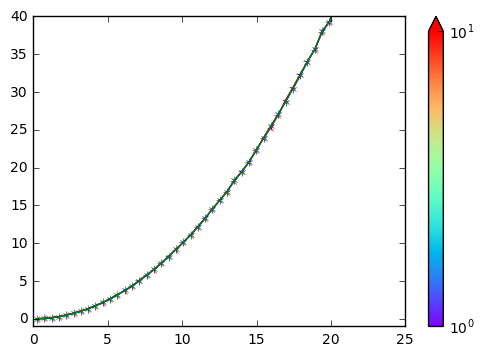

In [236]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# pcm=plt.pcolor(X,Y,H,norm =LogNorm(vmin=1,vmax=10),cmap='rainbow');
plt.colorbar(pcm, ax=ax1, extend='max')
xcenter = xedges[1:]-np.diff(xedges)[0]*0.5
ycenter = yedges[1:]-np.diff(yedges)[0]*0.5

plt.plot(xcenter[ind],avg,'r-3')
plt.plot(xc,avg2,'b-1')
plt.plot(xs,ys,'g-2')
plt.ylim(-1,40)

In [203]:
print(xs,xc)

[  2.4265368   7.2796104  12.132684   16.9857576  21.8388312] [  2.4265368   7.2796104  12.132684   16.9857576  21.8388312]


In [7]:
0.25e-9*3e8

0.07500000000000001

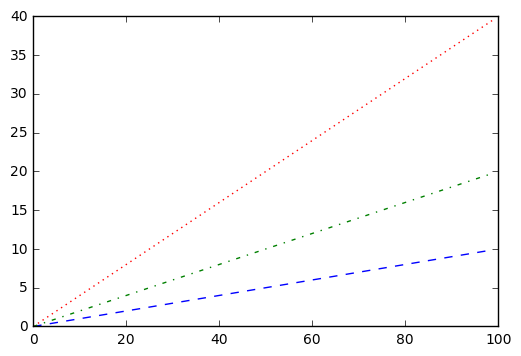

In [10]:
x= np.arange(100)
plt.figure()
plt.plot(x,0.1*x,'--')
plt.plot(x,0.2*x,'-.')
plt.plot(x,0.4*x,':')

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in true_divide


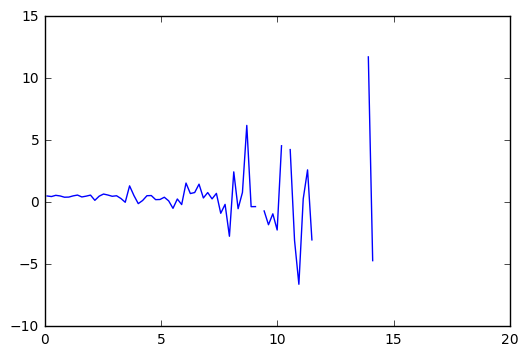

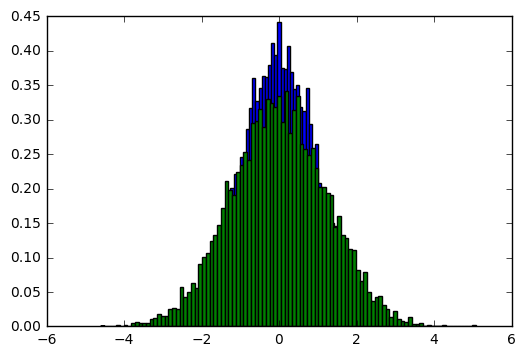

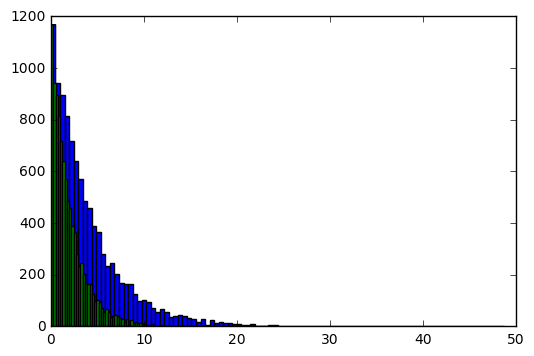

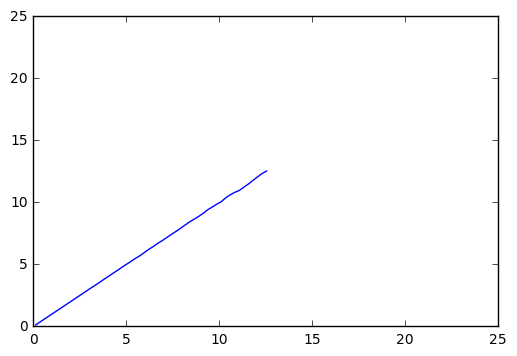

In [52]:
def centerit(edges):
    return edges[1:]-(edges[1]-edges[0])*0.5

N=np.int(1e4)
a0 =np.random.normal(0,1,N)
a=a0.copy()
for i in range(10000):
#     a += np.random.normal(0,0.01,N)
    a+= 0.01*np.cos(np.random.uniform(0,2*np.pi,N))
j0 = a0**2
j = a**2
da = a-a0
dj = j-j0

plt.figure()
ns,xs = np.histogram(j0,bins=100)
dbs,_ = np.histogram(j0,bins=100,weights=dj)
dbs = dbs/ns
plt.plot(centerit(xs),dbs)


plt.figure()
plt.hist(a0,bins=100,normed=True)
plt.hist(a,bins=100,normed=True)
# b =np.random.normal(0,2,N)
# b=a*2


#################
a= np.random.chisquare(2,N)
b= np.random.chisquare(2,N)*2
b=a*2
dba=b-a

plt.figure()
plt.hist(b,bins=100)
plt.hist(a,bins=100)

plt.figure()
ns,xs = np.histogram(a,bins=100)
dbs,_ = np.histogram(a,bins=100,weights=dba)
dbs = dbs/ns
plt.plot(centerit(xs),dbs)

# Save txt files

In [7]:
x = np.linspace(0,1,10)
np.savetxt('test.txt',[x,2*x])
a,b = np.loadtxt('test.txt')
print(a,b)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ] [ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]


In [20]:
x = np.array([])
x = np.concatenate((x,np.arange(2)),axis=0)
x = np.concatenate((x,np.arange(2)),axis=0)
x = np.unique(x)
x

array([ 0.,  1.])

# Lists etc

In [31]:
a = {'a':1, 'b':2}
a['b']


2

In [32]:
a.update({4:4})

In [33]:
a[4]

4

In [29]:
son = 'sondre'
NAMES = [son+'1',son+'2',son+'3','michael']
for i,name in enumerate(NAMES):
    if name[:4] == NAMES[i-1][:4]:
        print(i,'yes')
NAMES[1]    

1 yes
2 yes


'sondre2'

In [21]:
a = [np.arange(1),np.arange(1)]
print(a,a[0])
a[0]=[1,2]
print(a)

[array([0]), array([0])] [0]
[[1, 2], array([0])]


In [27]:
a = np.array([1,1,1,1,2,2,2,2,3])
np.where(a==2)[0][0]

4